In [1]:
# Step 0. Load libraries and custom modules
# Data manipulation ----------------------------------------------------
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Deep learning --------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
# Step 1. Load data
# 1.1 Fetch dataset
dataset = fetch_ucirepo(id=42)
X = dataset.data.features
y = dataset.data.targets

In [3]:
# 1.2 Create dataframe and save it for later use
df_raw = pd.DataFrame(X)
df_raw['target'] = y
df_raw.to_csv('../data/glass_identification.csv', index=False)

In [4]:
# 1.3 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   target  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# 1.4 Get a reproducible sample
df_raw.sample(10, random_state=42)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [6]:
# 2. Preprocessing data
# 2.1 Create a copy
df_interim = df_raw.copy() 

In [7]:
# 2.2 Convert target to categorical
df_interim['target'] = pd.Categorical(df_interim['target'])

In [8]:
# 3. Data analysis
# 3.1 Create a copy
df = df_interim.copy()

In [9]:
# 3.2 Split the dataset 
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [10]:
# 3.3 Create a train dataframe for analysis
df_train = pd.concat([X_train, y_train], axis=1)

In [11]:
df_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
71,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
...,...,...,...,...,...,...,...,...,...,...
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7
63,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.00,0.00,1
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,3
150,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3


In [12]:
# 3.4 Summarize data
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RI,171.0,NaN,NaN,NaN,1.518503,0.003077,1.51115,1.516525,1.51769,1.51917,1.53393
Na,171.0,NaN,NaN,NaN,13.373567,0.836909,10.73000,12.870000,13.25000,13.79500,17.38000
Mg,171.0,NaN,NaN,NaN,2.738304,1.414753,0.00000,2.260000,3.48000,3.61000,4.49000
Al,171.0,NaN,NaN,NaN,1.434035,0.488392,0.34000,1.180000,1.35000,1.62000,3.50000
Si,171.0,NaN,NaN,NaN,72.641637,0.791757,69.81000,72.300000,72.78000,73.09500,75.41000
K,171.0,NaN,NaN,NaN,0.489064,0.555769,0.00000,0.130000,0.56000,0.61000,6.21000
Ca,171.0,NaN,NaN,NaN,8.957427,1.370504,5.79000,8.235000,8.60000,9.16500,16.19000
Ba,171.0,NaN,NaN,NaN,0.177368,0.516317,0.00000,0.000000,0.00000,0.00000,3.15000
Fe,171.0,NaN,NaN,NaN,0.063801,0.103334,0.00000,0.000000,0.00000,0.11000,0.51000
target,171.0,6.0,2.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 3.5 Count target values
df_train['target'].value_counts()

target
2    61
1    56
7    23
3    14
5    10
6     7
Name: count, dtype: int64

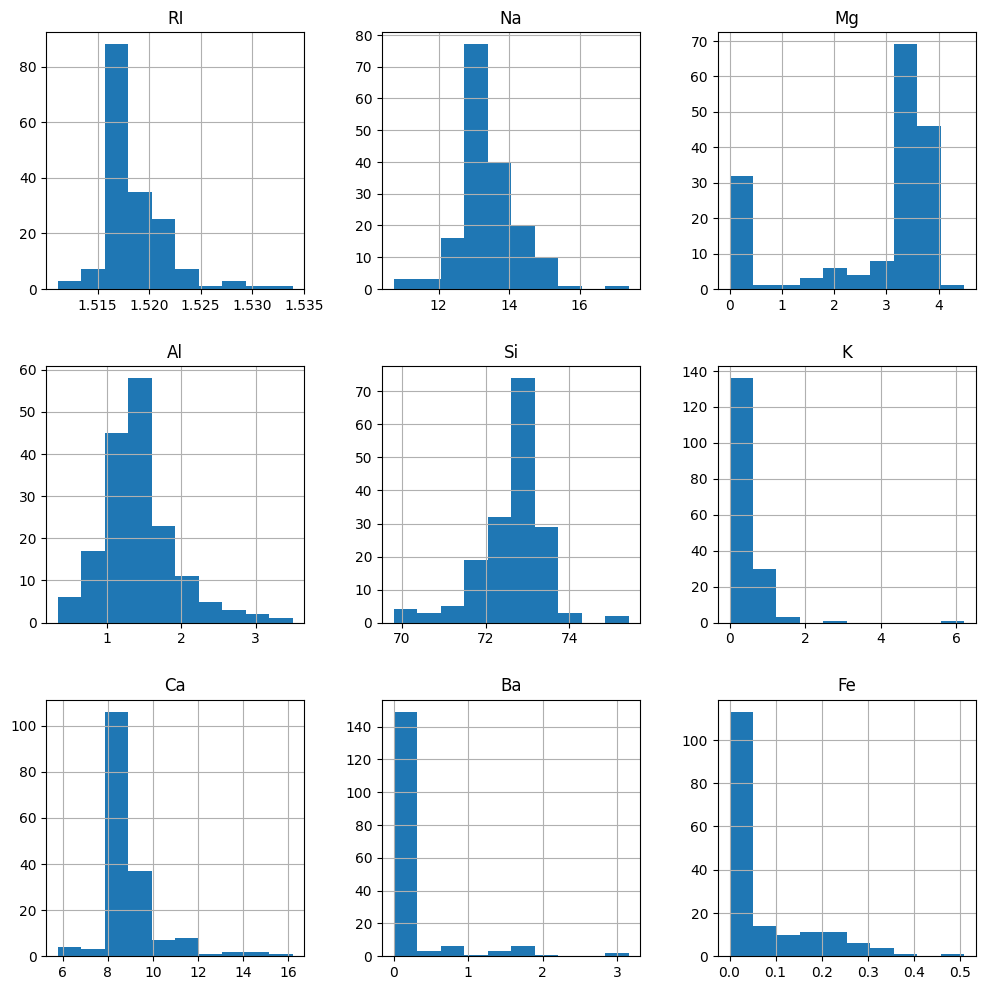

In [14]:
# 3.6 Perform univariate analysis - Histograms
df_train.hist(figsize=(12,12))
plt.show()

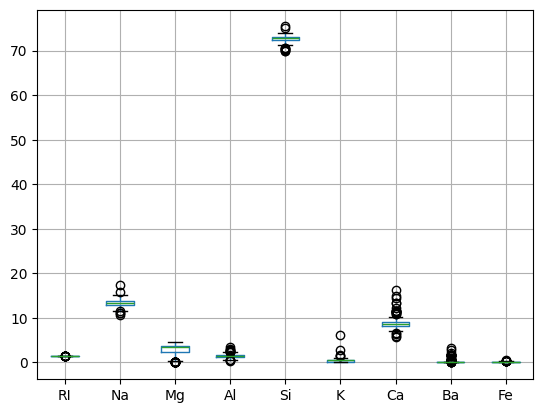

In [15]:
# 3.7 Perform univariate analysis - Boxplot
df_train.boxplot()
plt.show()

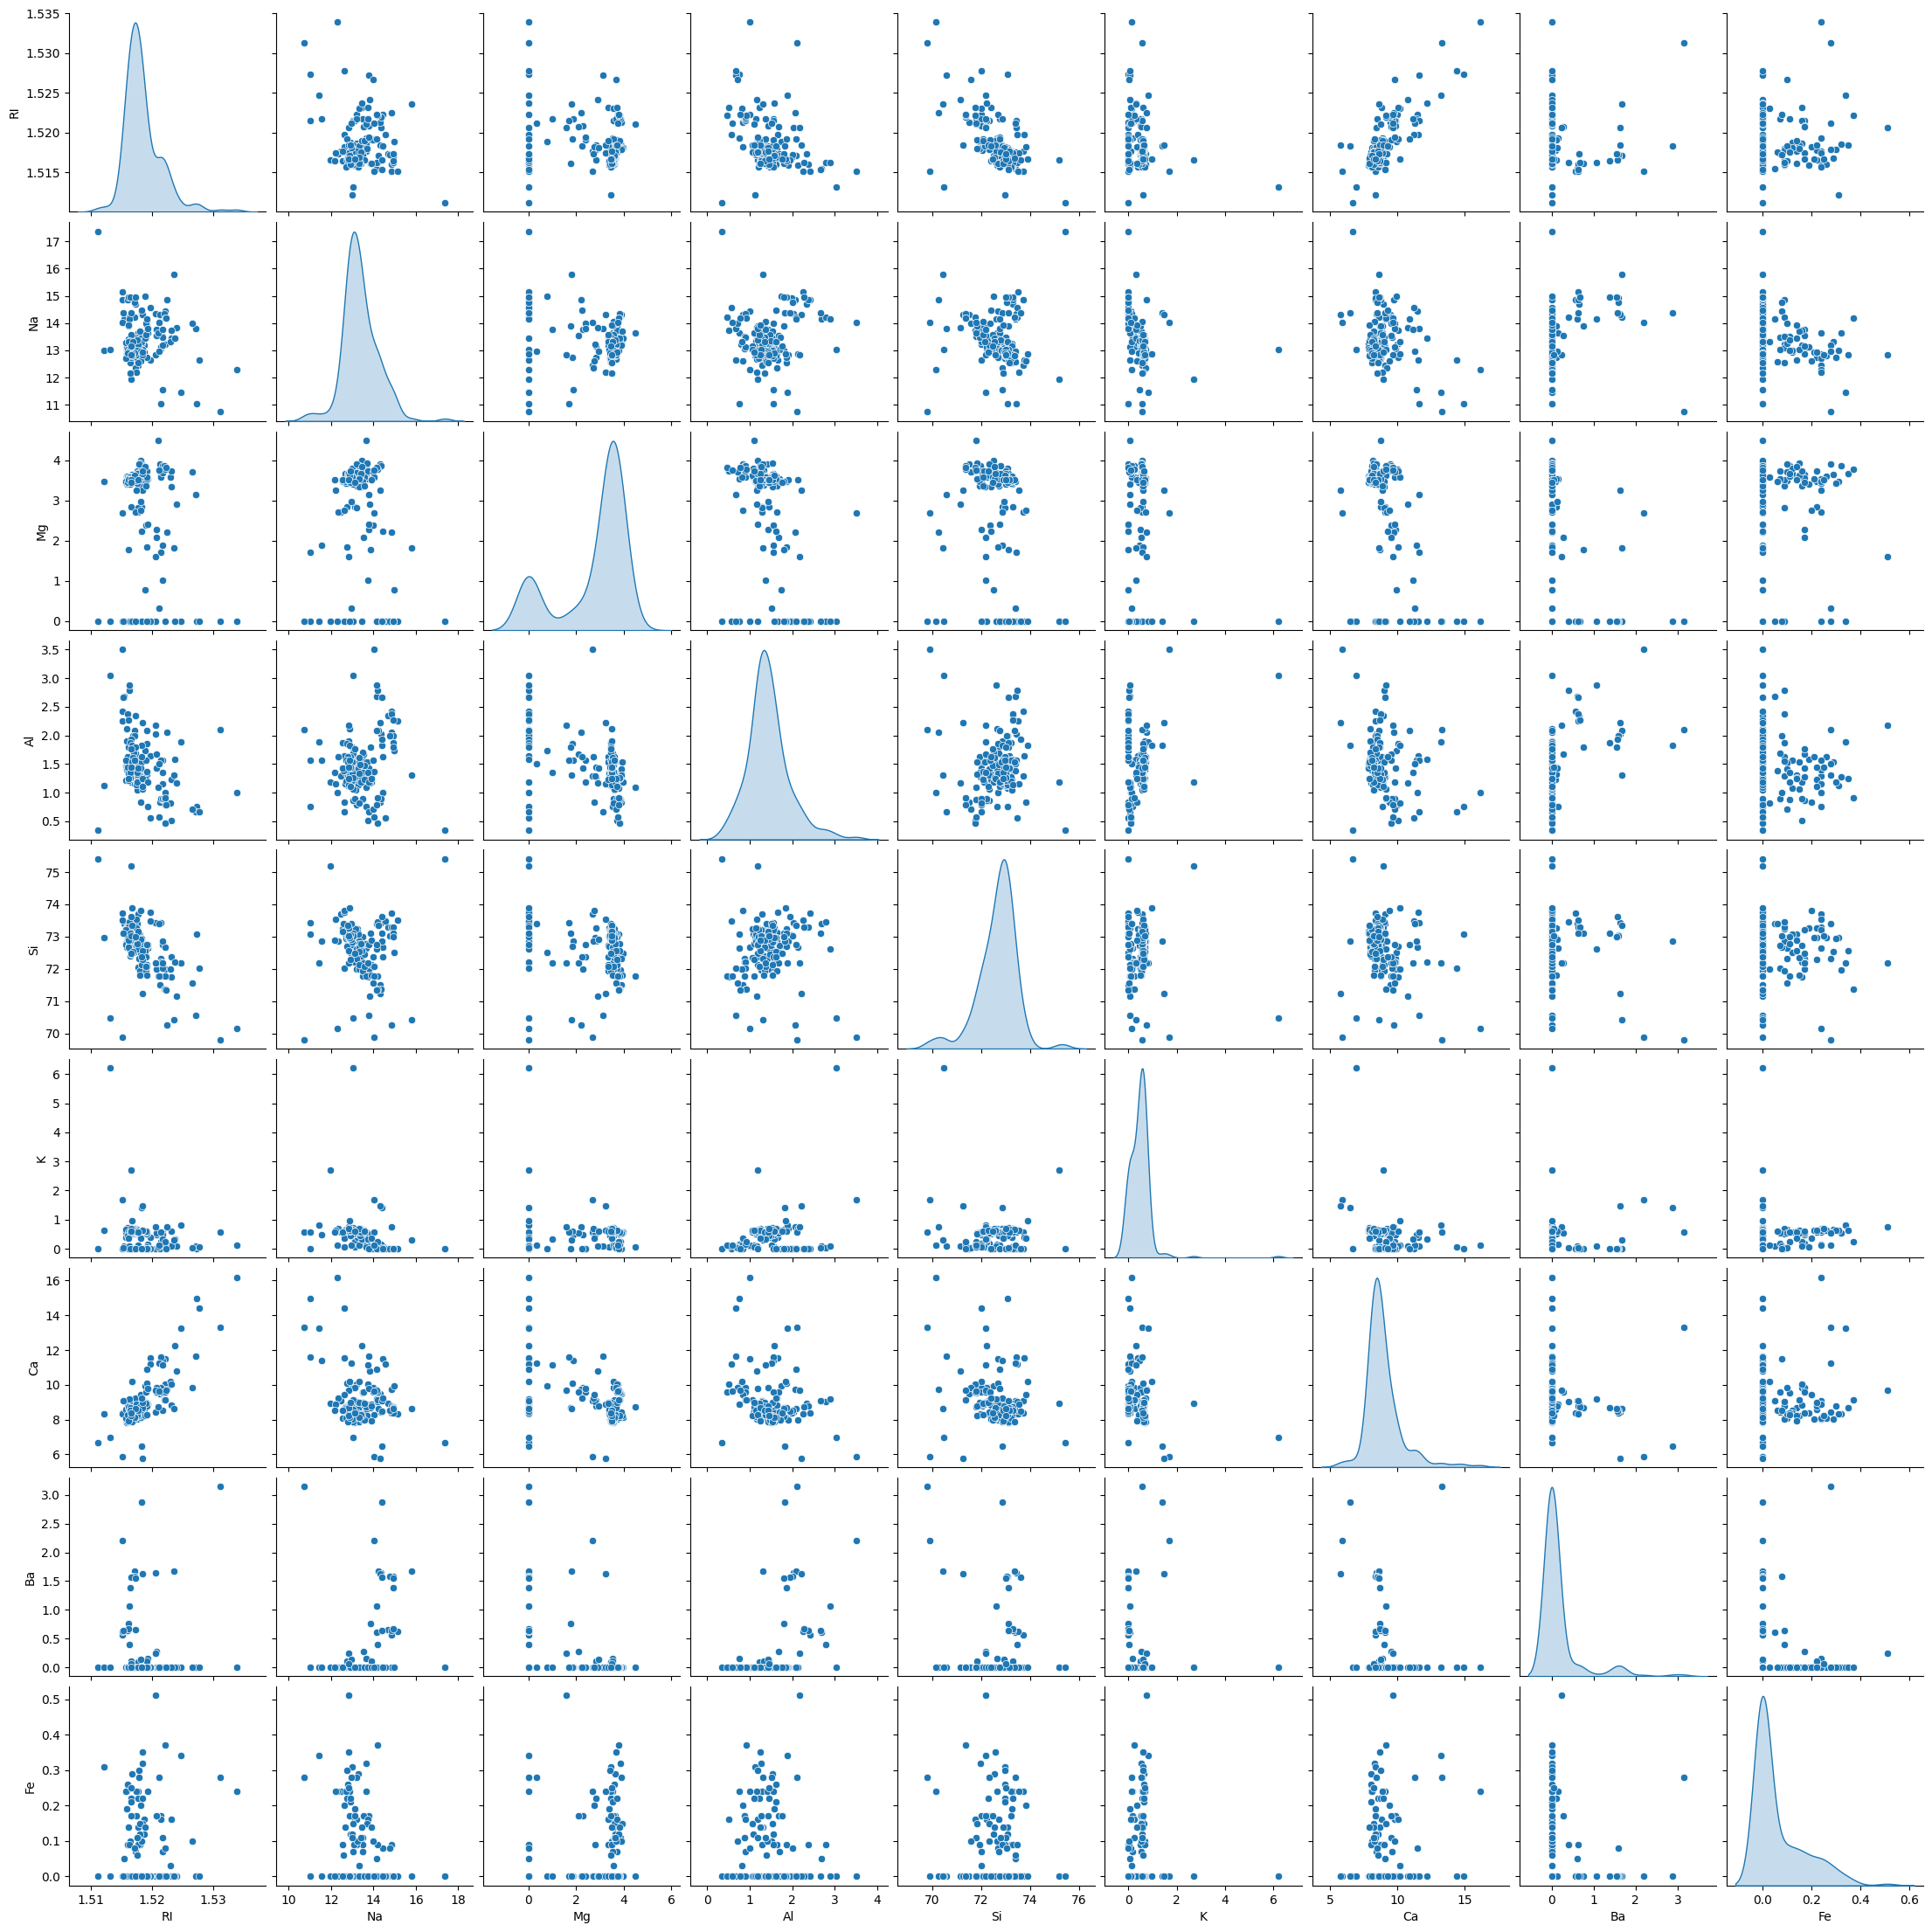

In [16]:
# 3.8 Perform bivariate analysis - Histograms per class
sns.pairplot(df_train, diag_kind='kde')
plt.show()

In [17]:
# 3.9 Analyze correlation
df_train.drop('target', axis=1).corr().style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.162525,-0.127985,-0.376298,-0.597097,-0.267911,0.807250,0.048621,0.138593
Na,-0.162525,1.000000,-0.289273,0.124196,-0.069323,-0.300450,-0.276586,0.309819,-0.259910
Mg,-0.127985,-0.289273,1.000000,-0.483740,-0.176241,0.046674,-0.420435,-0.517756,0.076507
Al,-0.376298,0.124196,-0.483740,1.000000,0.024404,0.279500,-0.243266,0.500170,-0.073387
Si,-0.597097,-0.069323,-0.176241,0.024404,1.000000,-0.115683,-0.258280,-0.147304,-0.083903
K,-0.267911,-0.300450,0.046674,0.279500,-0.115683,1.000000,-0.309399,-0.031276,0.005470
Ca,0.807250,-0.276586,-0.420435,-0.243266,-0.258280,-0.309399,1.000000,-0.093934,0.141630
Ba,0.048621,0.309819,-0.517756,0.500170,-0.147304,-0.031276,-0.093934,1.000000,-0.059371
Fe,0.138593,-0.259910,0.076507,-0.073387,-0.083903,0.005470,0.141630,-0.059371,1.000000


In [18]:
# 4. Create the deep learning model
# 4.1 Split your training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 4.2 Standardize numerical values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 4.3 Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [21]:
# 4.4 Define your model architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(self).__init__()
        self.fc1 = nn.Linear(9, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 6)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# 4.5 Define the model, optimizer and criterion
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD()